# Phase-field crystal tutorial: Stresses and strains 

In this tutorial, we will have a look at stresses and strains in the phase-field crystal. 

We start by initializing a phase-field crystal with a dislocation dipole, if you are confused by this procedure, check out the [PFC basic framework tutorial](https://colab.research.google.com/github/vidarsko/ComFiT/blob/main/tutorial/phase_field_crystal_basic_framework.ipynb). 

In [1]:
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf
import numpy as np
import matplotlib.pyplot as plt


dipole position [108.82796185405306, 94.24777960769379]
dipole vector [72.55197456936871, 0.0]
(210, 1) (210, 1) (210, 1)
210


Evolving the PFC:   0%|          | 0/10 [00:00<?, ?it/s]

Evolving the PFC: 100%|██████████| 10/10 [00:00<00:00, 146.93it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

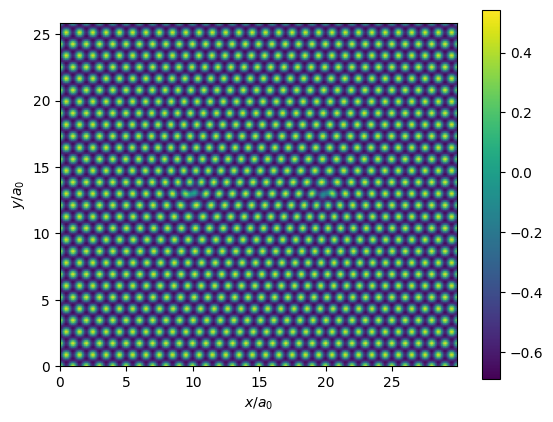

In [2]:
pfc = cf.PhaseFieldCrystal2DTriangular(30, 15)
eta = pfc.calc_amplitudes_with_dislocation_dipole()
pfc.conf_PFC_from_amplitudes(eta)
pfc.evolve_PFC(10)
pfc.plot_field(pfc.psi)

Now we calculate the stress field 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

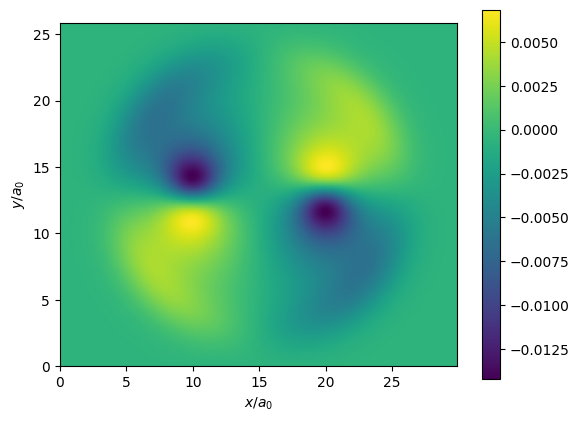

In [3]:
stress =  pfc.calc_stress_tensor()
pfc.plot_field(stress[0])

Above, you see the $xx$ component of the stress, the circular region is an artifact of the initial condition (see [documentation](https://vidarsko.github.io/ComFiT/ClassBaseSystem/#periodic-boundary-conditions-numerical-implementation-of-angle-fields)), and will disappear as the simulation progresses.


The stress tensor is a symmetric tensor and therefore only has three independent components. 
To save memory, these are saved in an array structure `stress[0]`, `stress[1]`, and `stress[2]`, where `stress[0]` is the $xx$ component, `stress[1]` is the $xy$ component, and `stress[2]` is the $yy$ component.
You can extract a specific component from this tensor by using the `get_sym` method.

For more information on this point, see [documentation](https://vidarsko.github.io/ComFiT/ClassBaseSystem/). 

Let us plot all the components in units of the elastic shear modulus `el_mu`. 

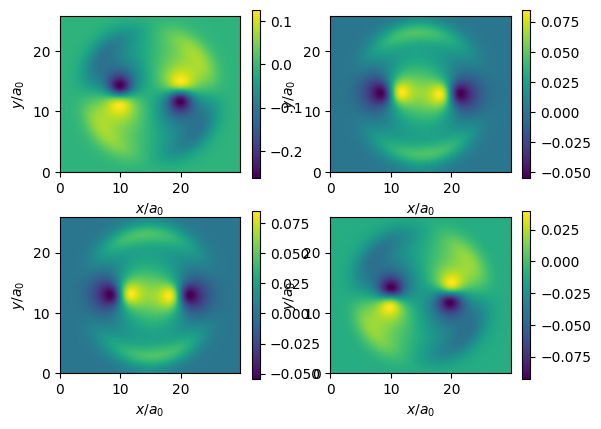

In [4]:
fig = plt.figure()
axs = fig.subplots(2,2)
for i in range(2):
    for j in range(2):
        pfc.plot_field(pfc.get_sym(stress,i,j)/pfc.el_mu,ax=axs[i,j])

Now, lets have a look at stresses for dislocations in other symmetries.
For information on how these are calculated, see the [documentation](https://vidarsko.github.io/ComFiT/ClassPhaseFieldCrystal/#elasticity). 

In [7]:
pfc = cf.PhaseFieldCrystal2DSquare(30, 30)
print(pfc.x.shape)
print(pfc.xRes)
eta = pfc.calc_amplitudes_with_dislocation_dipole(dislocation_type=2)
pfc.conf_PFC_from_amplitudes(eta)
pfc.evolve_PFC(100)

for i in range(2):
    for j in range(2):
        pfc.plot_field(pfc.get_sym(stress,i,j)/pfc.el_mu,ax=axs[i,j])

(209, 1)
210
dipole position [94.24777960769379, 94.24777960769379]
dipole vector [62.831853071795855, 0.0]
(209, 1) (209, 1) (209, 1)
210


ValueError: cannot reshape array of size 209 into shape (210,)